# Biochemistry 570 Midterm Exam

Tyson Wheelwright

#### Question 1

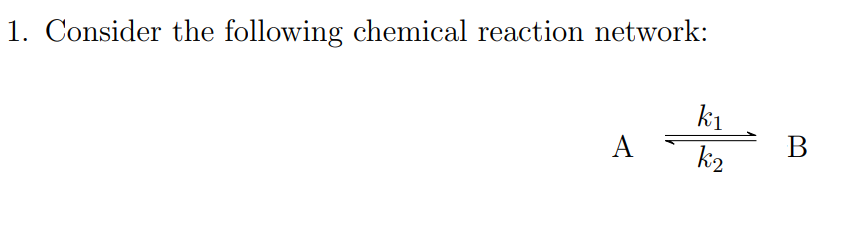

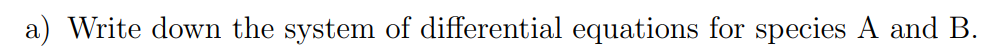

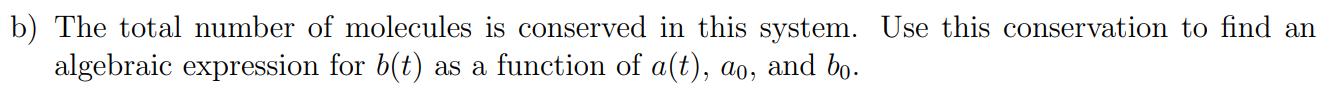

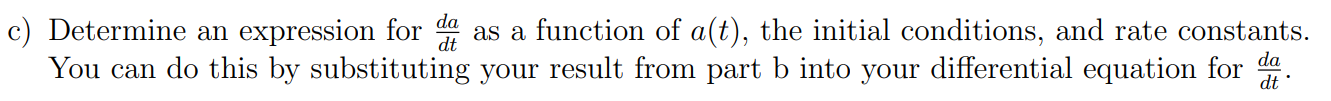

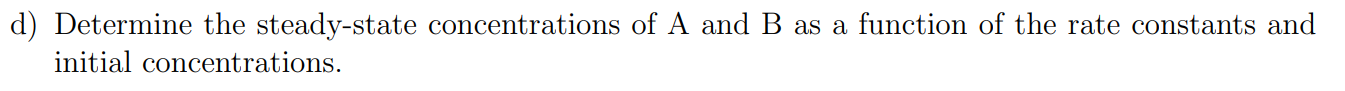

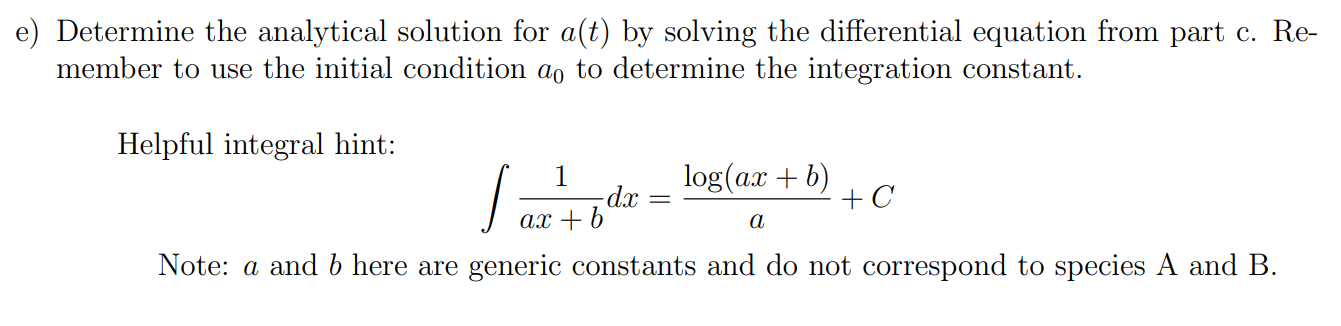

#### Question 2

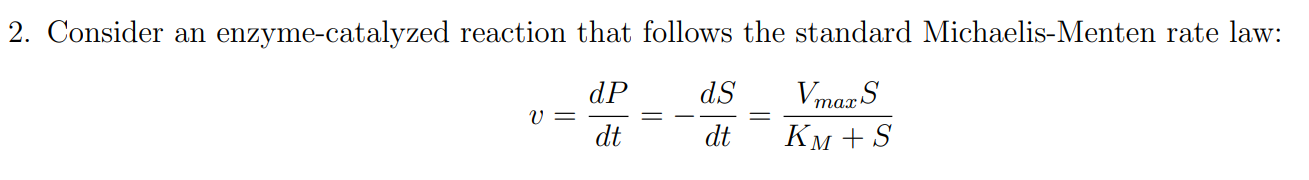

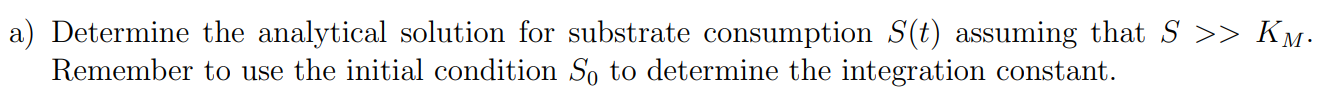

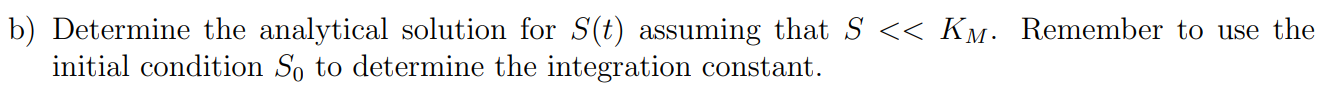

#### Question 3

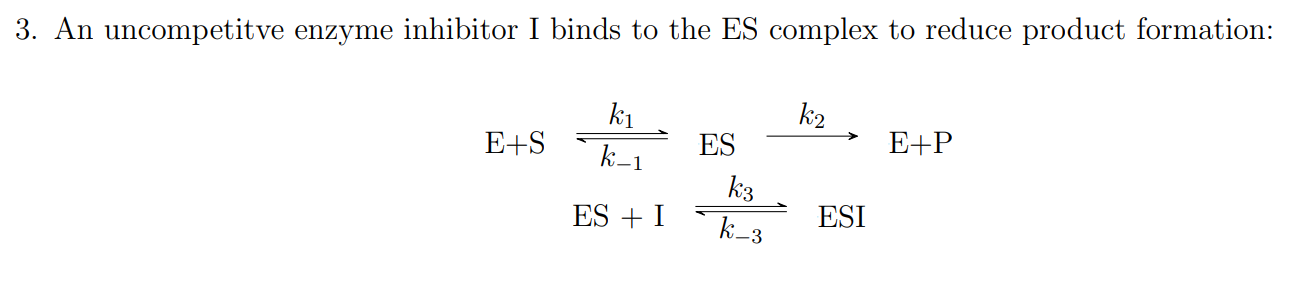

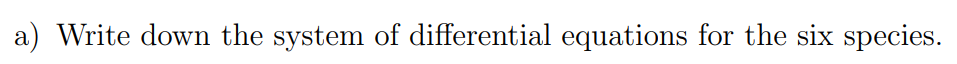

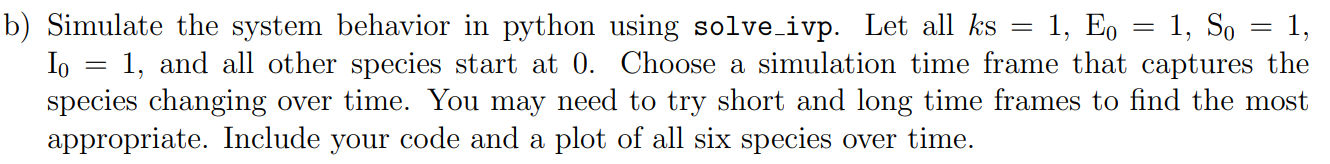

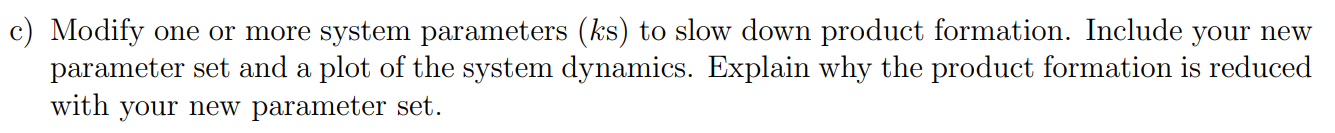

#### Question 4

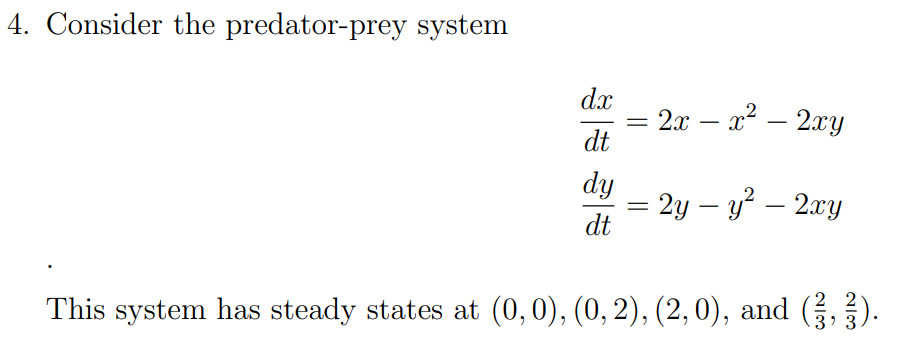

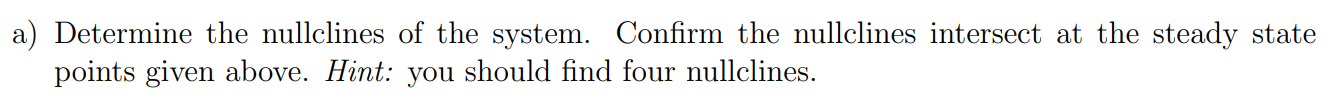

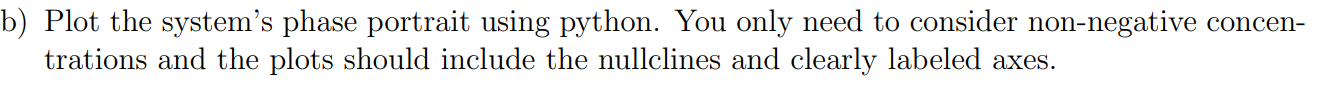

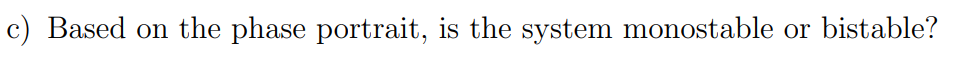